# Preliminaries

## Dataset

In this set of exercises we will use the same dataset as from [week 3](week_3.ipynb). 


As before, we provide the data already curated in the following two files:

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data can be read as `pandas` `DataFrame` in the following way:

In [1]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

The goal of the exercises is to train support vector machine (SVM) and random forests classifiers on this dataset and explore and learn about their hyperparameters. 

## Tools

The `scikit-learn` library provides the required tools for support vector machines, as well as for random forest algorithms.

In [2]:
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs, make_circles
from sklearn.metrics import classification_report

Before proceeding, look up the documentation of the imported functions and read about their basic functionality. Below, we list some important parameters of SVMs and random forests that can be tuned during training.

#### Support Vector Machines (SVM)

`C`: error term.

`kernel`: similarity function ('linear', 'poly', 'sigmoid' or 'rbf')

`gamma`: kernel coef. for 'rbf', 'poly' and 'sigmoid' kernels. It can be thought of as the ‘spread’ of the kernel and therefore the decision region.

`degree`: degree for the 'poly' kernel.

`coef0`: independt term in the 'poly' and 'sigmoid' kernels


#### Random Forests

`n_estimators`: number of trees in our random forest.

`max_depth`: maximum number of levels in each decision tree

`max_features`: maximum number of features to consider per split in an individual tree.

`min_sample_leaf`: minimum number of data points per leaf node

`min_samples_split`: minimum number of data points placed in a node before the node is split

`oob_score`: the out-of-bag (OOB) error is the average error for each observation calculated using predictions from the trees that do not contain that observation in their respective bootstrap sample. Set this parameter to true.

`bootstrap`: method for sampling data points (with or without replacement). Set this parameter to true.

`criterion`: function used to measure the quality of the split (e.g. 'entropy' or 'gini')

# Exercises

## Support vector machines

The  `make_blobs` and `make_circles` functions can be used to generate linearly and not linearly separable toy datasets. 

In [3]:
# data generation: linearly separable
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

The following code illustrates how to train a linear SVM classifier and plot the data points, the separating hyperplane, the support vectors and the margins that pass through them (considering the training data)

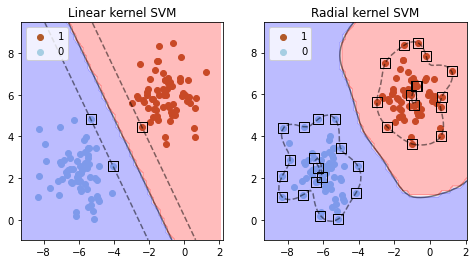

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# build the model
model = svm.SVC(kernel='linear', random_state=33)
model_rbf = svm.SVC(kernel='rbf', gamma=0.5, random_state=164)
model.fit(X_train, Y_train)
model_rbf.fit(X_train, Y_train)

def plot_two_svm_models(model, model_rbf):
    # create plot
    fig, axs = plt.subplots(1,2)
    fig.set_figwidth(8)

    # get colors from qualitative colormap 'Paired'
    cmap = plt.cm.get_cmap('Paired')

    for ax in axs:
        # plot data points
        ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
                c=[cmap(11)], label='1')
        ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
                c=[cmap(0)], label='0')
        ax.legend(loc='best')

    # plot the decision function
    # create grid to evaluate model
    x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

    XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                        np.arange(x2_min, x2_max, .2))

    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    Z_rbf = model_rbf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    axs[0].contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
    axs[1].contour(XX, YY, Z_rbf, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

    # Establish the class for each point in the contour
    Z = model.predict(xy).reshape(XX.shape)
    Z_rbf = model_rbf.predict(xy).reshape(XX.shape)

    # Visualization of the contour
    axs[0].contourf(XX, YY, Z, cmap='bwr', alpha=0.3)
    axs[1].contourf(XX, YY, Z_rbf, cmap='bwr', alpha=0.3)

    # plot support vectors, whose are responsible for building the margins
    axs[0].scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k', marker='s')
    axs[1].scatter(model_rbf.support_vectors_[:, 0], model_rbf.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k', marker='s')

    axs[0].axis([x1_min, x1_max, x2_min, x2_max])
    axs[1].axis([x1_min, x1_max, x2_min, x2_max])
    plt.axis('tight')
    axs[0].set_title('Linear kernel SVM')
    axs[1].set_title('Radial kernel SVM')
    plt.show()
plot_two_svm_models(model, model_rbf)

Train a radial basis function (RBF) SVM classifier with `gamma=0.5` and plot the results in the same way.

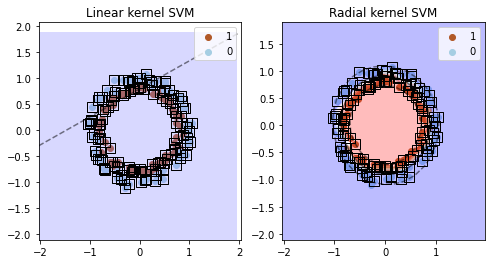

In [5]:
# data generation: not linearly separable
X, Y = make_circles(n_samples=200, noise=0.05, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

model = svm.SVC(kernel='linear', random_state=12)
model_rbf = svm.SVC(kernel='rbf', gamma=0.5, random_state=97)

model.fit(X_train, Y_train)
model_rbf.fit(X_train, Y_train)

plot_two_svm_models(model, model_rbf)

<p><font color='#770a0a'>When should a RBF kernel be used over a linear kernel? Motivate your answer.</font></p>

**Answer:** When one class is closed-in in the linear feature space by the other class, it is useful to use the RBF kernel, as this is able to form a closed boundary around one feature, whereas the linear kernel will not be able to separate those classes.

<p><font color='#770a0a'>Do we need to normalize the data before using a kernel function? Motivate your answer.
</font></p>

**Answer:** Yes, we need to normalize, as the kernels are some measure of similarity between two features. However, when we are interested in similarity only, both vectors in the inner product need to be of the same magnitude (otherwise, one feature may count heavier than the other). Therefore, it is required to normalize data before using a kernel function.

## Predicting drug response on cell lines from gene expression data with SVMs

Explore the hyper-parameter space of an SVM classifier with cross-validation for the Genomics of Drug Sensitivity in Cancer (GDSC) dataset. The`GridSearchCV` function can be used to specify a grid of parameter values with the `param_grid` parameter.

Calculate the precision of your predictions, and compare your calculations with the results of `classification_report`, which displays many classification metrics.


## Random forests

Follow the same steps as for SVM. Compare the two algorithms and report which one has better performance.

The random forests classifiers allows to perform feature selection. Evaluate the importance of features extracting the top 50 informative features. A bar plot (`plt.bar()`) can be a useful tool to visualize this. 


## Biomedical applications

Driven by technological advances, there has recently been a dramatic increase in availability of biomedical data. Machine learning approaches are well suited to take advantage of this data and have been widely applied to many areas of biology. 

Example of these applications are genome annotation, biomarker identification, systems biology, genome data analysis, protein  function  prediction, protein  structure prediction, protein localization prediction, identification of protein interactions and drug discovery.

SVM and RF methods are among the most popular machine learning methods applied in bioinformatics or computational biology.

Perform a literature search and find a biomedical study in which SVM or RF is applied to obtain certain insights. <p><font color='#770a0a'>Explain the motivation behind using that specific algorithm in the study.
</font></p>

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

x_data = gene_expression
y_data = drug_response
y_data = np.sign(y_data)
y_data[y_data.values == -1.] = 0
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=333)



In [7]:
## Warning, longer runtime (approx. 1 min)
def svm_estimator(C=1., gamma=0.5):
    return Pipeline([
        ('normalization', StandardScaler()),
        ('svm', svm.SVC(C=C,kernel='rbf',gamma=gamma))
        ])

C_range = np.linspace(1,100,num=50)
gamma_range = np.logspace(-3, 0, num=50)

param_grid = {'svm__C': C_range, 'svm__gamma': gamma_range}

model_svm = GridSearchCV(svm_estimator(), param_grid, cv=5, verbose=2, n_jobs=6)
model_svm.fit(X_train, Y_train)

Fitting 5 folds for each of 2500 candidates, totalling 12500 fits
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    4.8s
[Parallel(n_jobs=6)]: Done 786 tasks      | elapsed:    8.3s
[Parallel(n_jobs=6)]: Done 2410 tasks      | elapsed:   15.7s
[Parallel(n_jobs=6)]: Done 4674 tasks      | elapsed:   25.1s
[Parallel(n_jobs=6)]: Done 7594 tasks      | elapsed:   37.4s
[Parallel(n_jobs=6)]: Done 11154 tasks      | elapsed:   51.5s
[Parallel(n_jobs=6)]: Done 12500 out of 12500 | elapsed:   57.4s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('normalization', StandardScaler()),
                                       ('svm', SVC(gamma=0.5))]),
             n_jobs=6,
             param_grid={'svm__C': array([  1.        ,   3.02040816,   5.04081633,   7.06122449,
         9.08163265,  11.10204082,  13.12244898,  15.14285714,
        17.16326531,  19.18367347,  21.20408163,  23.2244898 ,
        25.24489796,  27.26530612,  29.28571429,  31.30612245,
        33.32653061,  35.34693878,  37.3673...
       0.00828643, 0.00954095, 0.01098541, 0.01264855, 0.01456348,
       0.01676833, 0.01930698, 0.02222996, 0.02559548, 0.02947052,
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ])},
          

In [8]:
print(model_svm.best_params_)
print(model_svm.best_estimator_)
prediction = model_svm.predict(X_test)

print(classification_report(Y_test, prediction))

{'svm__C': 3.020408163265306, 'svm__gamma': 0.010985411419875584}
Pipeline(steps=[('normalization', StandardScaler()),
                ('svm', SVC(C=3.020408163265306, gamma=0.010985411419875584))])
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        43
         1.0       0.17      0.17      0.17         6

    accuracy                           0.80        49
   macro avg       0.53      0.53      0.53        49
weighted avg       0.80      0.80      0.80        49



In [9]:
## Warning, longer runtime (approx. 11 min)
def rf_estimator(n_estimators=100, max_depth=None):
    return Pipeline([
        ('normalization', StandardScaler()),
        ('randomforest', RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth))
        ])

n_estimators_range = np.linspace(10,200,num=50, dtype='i')
max_depth_range = np.linspace(5, 50, num=50, dtype='i')
param_grid = {'randomforest__n_estimators': n_estimators_range, 'randomforest__max_depth': max_depth_range}

model = GridSearchCV(rf_estimator(), param_grid, cv=5, verbose=2, n_jobs=-1)
model.fit(X_train, Y_train)

Fitting 5 folds for each of 2500 candidates, totalling 12500 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 7922 tasks      

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('normalization', StandardScaler()),
                                       ('randomforest',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforest__max_depth': array([ 5,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int32),
                         'randomforest__n_estimators': array([ 10,  13,  17,  21,  25,  29,  33,  37,  41,  44,  48,  52,  56,
        60,  64,  68,  72,  75,  79,  83,  87,  91,  95,  99, 103, 106,
       110, 114, 118, 122, 126, 130, 134, 137, 141, 145, 149, 153, 157,
       161, 165, 168, 172, 176, 180, 184, 188, 192, 196, 200], dtype=int32)},
             verbose=2)

In [10]:
print(model.best_params_)
print(model.best_estimator_)
prediction = model.predict(X_test)

print(classification_report(Y_test, prediction))

{'randomforest__max_depth': 11, 'randomforest__n_estimators': 25}
Pipeline(steps=[('normalization', StandardScaler()),
                ('randomforest',
                 RandomForestClassifier(max_depth=11, n_estimators=25))])
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        43
         1.0       0.50      0.50      0.50         6

    accuracy                           0.88        49
   macro avg       0.72      0.72      0.72        49
weighted avg       0.88      0.88      0.88        49



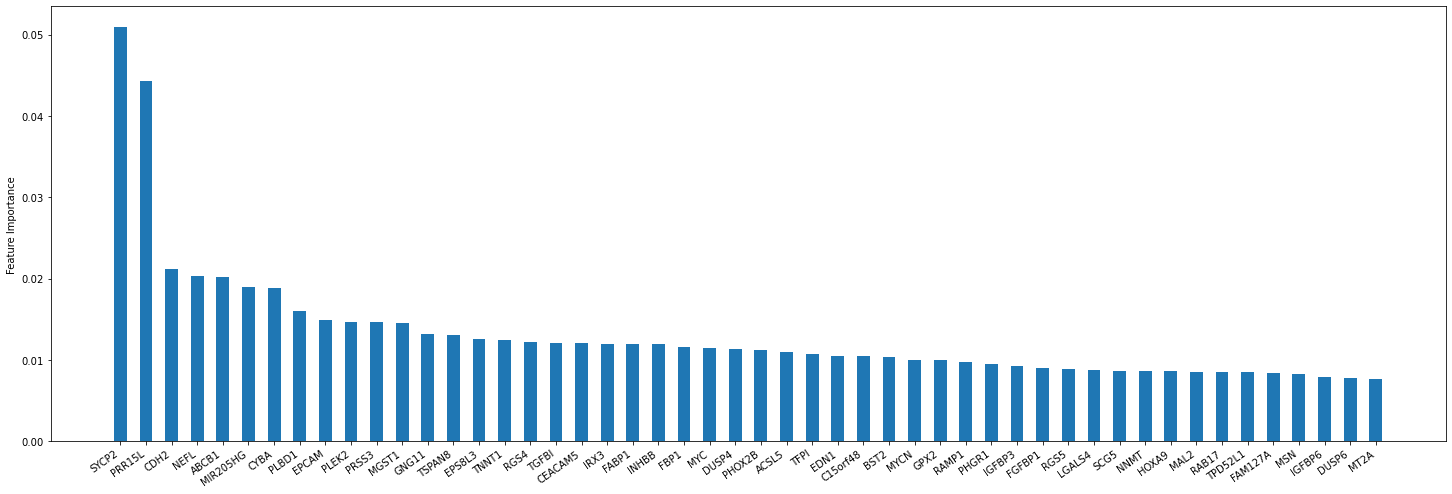

In [21]:
n_estimators = model.best_params_['randomforest__n_estimators']
forest = model.best_estimator_.named_steps['randomforest']
importances = forest.feature_importances_

imp_idx = np.argsort(importances)[::-1]
features = x_data.keys()[imp_idx][:50]
heights = importances[imp_idx][:50]

plt.figure(figsize=(25,8))
plt.bar(np.arange(0,10*50,10),heights, width=5, tick_label=features)

plt.xticks(rotation=35, ha='right')
plt.ylabel('Feature Importance')
plt.show()